In [99]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
%matplotlib inline


In [100]:
train = pd.read_csv('/Users/dishabhatnagar/Desktop/Titanic/train.csv')

In [101]:
test = pd.read_csv("/Users/dishabhatnagar/Desktop/Titanic/test.csv")

In [102]:
print(train.columns.values)


['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [103]:
train.fillna(train.mean(), inplace=True)
test.fillna(test.mean(), inplace=True)


In [104]:
train = train.drop(['Name','Ticket','Cabin','Embarked','SibSp','Parch','Pclass','Sex'], axis=1)

In [105]:
print(train.head())


   PassengerId  Survived   Age     Fare
0            1         0  22.0   7.2500
1            2         1  38.0  71.2833
2            3         1  26.0   7.9250
3            4         1  35.0  53.1000
4            5         0  35.0   8.0500


In [106]:
test = test.drop(['Name','Ticket', 'Cabin','Embarked','SibSp','Parch','Pclass','Sex'], axis=1)


In [107]:
X = np.array(train.drop(['Survived'], 1).astype(float))


In [108]:
X

array([[  1.        ,  22.        ,   7.25      ],
       [  2.        ,  38.        ,  71.2833    ],
       [  3.        ,  26.        ,   7.925     ],
       ...,
       [889.        ,  29.69911765,  23.45      ],
       [890.        ,  26.        ,  30.        ],
       [891.        ,  32.        ,   7.75      ]])

In [109]:
import scipy.cluster.hierarchy as sch


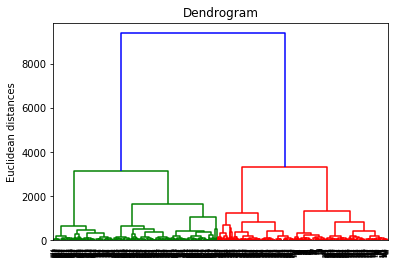

In [110]:
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

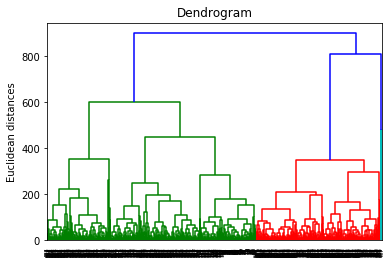

In [133]:
dendrogram = sch.dendrogram(sch.linkage(X, method  = "complete"))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

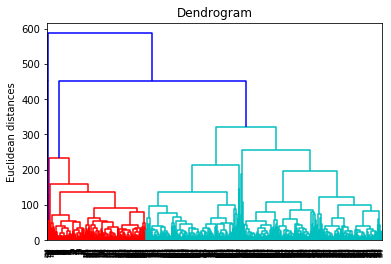

In [136]:
dendrogram = sch.dendrogram(sch.linkage(X, method  = "average"))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

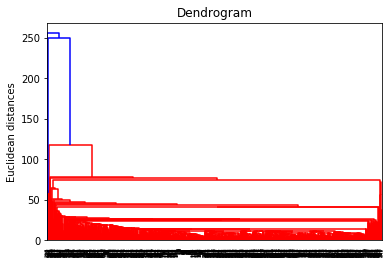

In [135]:
dendrogram = sch.dendrogram(sch.linkage(X, method  = "single"))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

In [112]:
from sklearn.cluster import AgglomerativeClustering 
## Taking number of clusters as 3

In [118]:
## Looking at the dendograms , it seems clustering is best in ward method.
## Using Euclidean distance as that is the simplest 
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')


In [119]:
y_hc=hc.fit_predict(X)


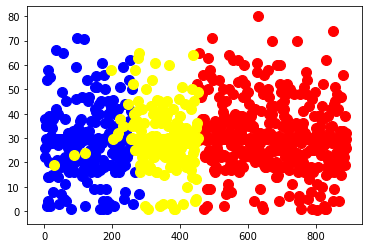

In [120]:
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=100, c='yellow', label ='Cluster 3')

In [124]:
## If i take the number of clusters as 2 
hc_1 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='ward')


In [126]:
y_hc1=hc_1.fit_predict(X)


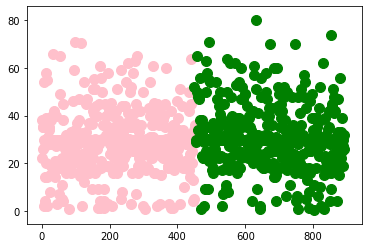

In [127]:
plt.scatter(X[y_hc1==0, 0], X[y_hc1==0, 1], s=100, c='pink', label ='Cluster 1')
plt.scatter(X[y_hc1==1, 0], X[y_hc1==1, 1], s=100, c='green', label ='Cluster 2')

In [139]:
## Using the single linkage metric for detection of outliers

hc_2 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='single')


In [140]:
y_hc2=hc_2.fit_predict(X)


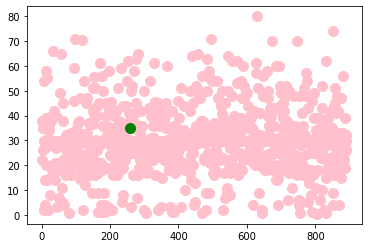

In [141]:
plt.scatter(X[y_hc2==0, 0], X[y_hc2==0, 1], s=100, c='pink', label ='Cluster 1')
plt.scatter(X[y_hc2==1, 0], X[y_hc2==1, 1], s=100, c='green', label ='Cluster 2')